# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 1. 資料預處理

In [2]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [4]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [5]:
# 將數字影像特徵值使用 reshape 轉換
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [6]:
# 將數字影像特徵值標準化
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [8]:
#把 LABEL(數字真實的值) 以 One-hot encoding 轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 2. 建立模型

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [14]:
#宣告採用序列模型
model = Sequential()

In [15]:
#建構輸入層
model.add(Dense(units = 1000,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [16]:
#建構隱藏層 1 # 加入 Drop 層避免 overfitting
model.add(Dropout(0.5))

In [17]:
#建構隱藏層 2
model.add(Dense(units = 1000,
                kernel_initializer = 'normal',
                activation = 'relu'))
model.add(Dropout(0.5))

In [18]:
#建構輸出層
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [20]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


# 3. 訓練模型

In [21]:
# 定義訓練方式
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [22]:
# 開始訓練
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot, 
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3681 - accuracy: 0.8847 - val_loss: 0.1371 - val_accuracy: 0.9578
Epoch 2/10
 - 7s - loss: 0.1598 - accuracy: 0.9512 - val_loss: 0.0971 - val_accuracy: 0.9707
Epoch 3/10
 - 7s - loss: 0.1228 - accuracy: 0.9622 - val_loss: 0.0847 - val_accuracy: 0.9739
Epoch 4/10
 - 7s - loss: 0.1000 - accuracy: 0.9688 - val_loss: 0.0820 - val_accuracy: 0.9753
Epoch 5/10
 - 7s - loss: 0.0855 - accuracy: 0.9723 - val_loss: 0.0755 - val_accuracy: 0.9782
Epoch 6/10
 - 7s - loss: 0.0723 - accuracy: 0.9766 - val_loss: 0.0766 - val_accuracy: 0.9777
Epoch 7/10
 - 7s - loss: 0.0651 - accuracy: 0.9798 - val_loss: 0.0853 - val_accuracy: 0.9773
Epoch 8/10
 - 7s - loss: 0.0618 - accuracy: 0.9800 - val_loss: 0.0801 - val_accuracy: 0.9771
Epoch 9/10
 - 7s - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.0728 - val_accuracy: 0.9797
Epoch 10/10
 - 7s - loss: 0.0530 - accuracy: 0.9828 - val_loss: 0.0704 - val_accuracy: 0.9810


In [25]:
# 顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation) :
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

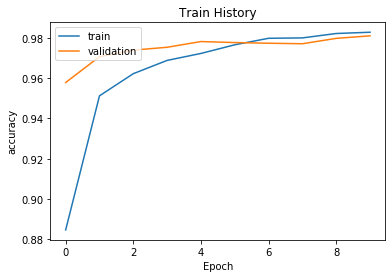

In [26]:
# 畫出 accuracy 執行結果
show_train_history(train_history, 'accuracy', 'val_accuracy')

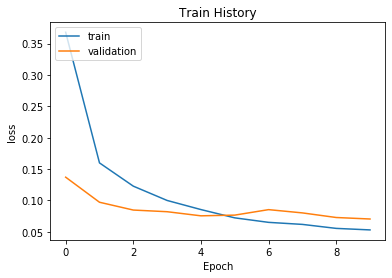

In [27]:
# 畫出 loss 誤差執行結果
show_train_history(train_history, 'loss', 'val_loss')

In [29]:
# 評估模型訓練過程的準確率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy =', scores[1])

10000/10000 [==============================] - 1s 75us/step

accuracy = 0.9818000197410583


## 結論 一  : 改變前訓練的準確度是 0.9786, 改變後是 0.9818, 有改善

# 4. 預測

In [30]:
# 進行預測
prediction = model.predict_classes(x_Test)

In [31]:
# 預測結果
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [34]:
# 建立函數
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10) :
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : num = 25
    for i in range(0, num) :
            ax = plt.subplot(5, 5, 1 + i)
            ax.imshow(images[idx], cmap = 'binary')
            title = "label = " + str(labels[idx])
            if len(prediction) > 0 :
                title += ", predict =" + str(prediction[idx])
                
            ax.set_title(title, fontsize = 10)
            ax.set_xticks([]);
            ax.set_yticks([])
            idx += 1
            
    plt.show()

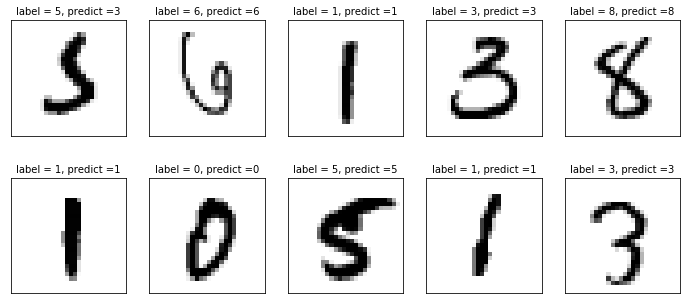

In [35]:
# 顯示預測結果
plot_images_labels_prediction(x_test_image,
                              y_test_label,
                              prediction,
                              idx = 340)

In [36]:
# 利用混淆矩陣檢查模型是否混淆了兩個類別
import pandas as pd
pd.crosstab(y_test_label, 
            prediction, 
            rownames = ['label'],
            colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,1,0,1,0,0,2,1,1,0
1,0,1129,3,0,0,1,2,0,0,0
2,3,1,1020,2,1,0,0,3,2,0
3,0,0,4,997,0,1,0,3,2,3
4,2,0,3,1,956,0,5,2,0,13
5,3,0,0,11,1,867,5,0,3,2
6,7,3,0,1,4,2,941,0,0,0
7,2,4,8,1,0,0,0,1005,1,7
8,3,1,5,10,2,3,4,3,941,2


#### (1) 對角線是預測正確, 發現真實是 5 被正確預測的比數最低, 即最容易混淆
#### (2) 其他非對角線的數字代表標籤預測錯誤

In [38]:
# 找出把 5 誤認為 3 的位置
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
4271,5,3
4360,5,3
5937,5,3


#### (3) 誤認 5 為 3 的筆數有11筆

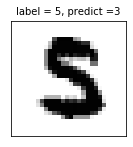

In [39]:
# 查看第 2526 筆資料
plot_images_labels_prediction(x_test_image,
                              y_test_label,
                             prediction,
                             idx = 2526,
                             num = 1)

# 6. 改善分類能力

In [42]:
# --- 資料預處理
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# --- 讀取資料
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

# --- 將數字影像特徵值使用 reshape 轉換為 4 維矩陣
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

# --- 將數字影像特徵值標準化
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

# --- 把 LABEL(數字真實的值) 以 One-hot encoding 轉成NUMERICAL Categorical 
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [47]:
# --- 建立卷積網路
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

## --- 建立卷積層 1
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu'))
## --- 建立池化層 1
model.add(MaxPooling2D(pool_size = (2, 2)))

### --- 建立卷積層 2
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
                 activation = 'relu'))
### --- 建立池化層 2
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

### --- 建立平坦層
model.add(Flatten())

### --- 建立隱藏層
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

### --- 建立輸出層
model.add(Dense(10, activation = 'softmax'))

In [48]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 16s - loss: 0.4913 - accuracy: 0.8487 - val_loss: 0.0976 - val_accuracy: 0.9716
Epoch 2/10
 - 16s - loss: 0.1366 - accuracy: 0.9600 - val_loss: 0.0661 - val_accuracy: 0.9806
Epoch 3/10
 - 16s - loss: 0.0999 - accuracy: 0.9701 - val_loss: 0.0543 - val_accuracy: 0.9839
Epoch 4/10
 - 17s - loss: 0.0813 - accuracy: 0.9757 - val_loss: 0.0452 - val_accuracy: 0.9874
Epoch 5/10
 - 18s - loss: 0.0693 - accuracy: 0.9793 - val_loss: 0.0424 - val_accuracy: 0.9876
Epoch 6/10
 - 18s - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.0388 - val_accuracy: 0.9886
Epoch 7/10
 - 19s - loss: 0.0541 - accuracy: 0.9836 - val_loss: 0.0367 - val_accuracy: 0.9896
Epoch 8/10
 - 19s - loss: 0.0471 - accuracy: 0.9859 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 9/10
 - 20s - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.0336 - val_accuracy: 0.9903
Epoch 10/10
 - 20s - loss: 0.0425 - accuracy: 0.9875 - val_loss: 0.0319 - val_accuracy: 0.9902


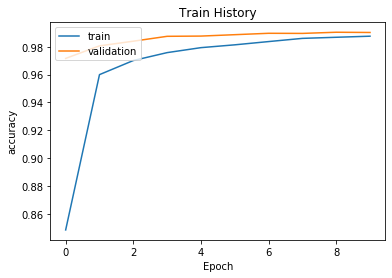

In [49]:
# --- 進行訓練

## --- 定義訓練方式
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])
## --- 開始訓練
train_history = model.fit(x = x_Train4D_normalize,
                          y = y_TrainOneHot, 
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 300,
                          verbose = 2)
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation) :
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')


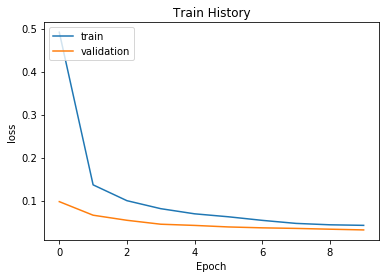

In [50]:
show_train_history(train_history, 'loss', 'val_loss')

In [51]:
# 評估模型訓練過程的準確率
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
print()
print('Convolution model accuracy =', scores[1])

10000/10000 [==============================] - 1s 137us/step

Convolution model accuracy = 0.9909999966621399


## 結論 二 : 資料重新處理後, 換成卷積模型, 則訓練準確度由 0.9818 提升至 0.9910

In [54]:
# 進行預測
predict = model.predict_classes(x_Test4D_normalize)

In [55]:
# 利用混淆矩陣檢查模型
import pandas as pd
pd.crosstab(y_test_label, 
            prediction, 
            rownames = ['label'],
            colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,0,1,2,0
1,0,1133,0,0,0,0,1,0,1,0
2,0,0,1031,0,0,0,0,1,0,0
3,0,0,2,1005,0,2,0,0,1,0
4,0,0,2,0,971,0,0,1,1,7
5,2,0,0,6,0,882,1,0,0,1
6,7,2,0,0,1,7,941,0,0,0
7,0,1,7,2,0,0,0,1015,1,2
8,2,0,3,3,0,1,0,2,962,1


In [56]:
# 找出把 5 誤認為 3 的位置
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df[(df.label == 5) & (df.predict == 3)]

,label,predict
1393,5,3
2035,5,3
2597,5,3
2970,5,3
3157,5,3
5937,5,3


#### (4) 誤認 5 為 3 的筆數從 11 筆降為 6 筆

# 總結 : 卷積模型有改善分類的效果